In [23]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
from data_scripts import *

tex_fonts = {
    # Use LaTeX to write all text
    # "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 9,
    "font.size": 9,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
}

sns.set_theme(
    # context="talk",
    context="paper",
    # rc={"figure.figsize": (8, 6)},
    palette="bright",
    style="whitegrid",
    rc=tex_fonts,
)

NUM_SIMS = 1
CONVERGED = False


data = {
    r"$L = L_{\mathrm{min}}$": load_data("poro_l0", n_newest=NUM_SIMS),
    r"$L = L_{\mathrm{phys}}$": load_data("poro_l1", n_newest=NUM_SIMS),
    "Dynamic": load_data("poro_ldynamic", n_newest=NUM_SIMS),
    "Random": load_data("poro_lrandom", n_newest=NUM_SIMS),
}


save_media_path = None

Loading data:
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/1/performance/poro_l0_6.npy
Loading data:
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/1/performance/poro_l1_3.npy
Loading data:
/home/firedrake/workspace/porepy_workspace/solver_selector/examples/1/performance/poro_ldynamic_3.npy


$L = L_{\mathrm{min}}$ 0


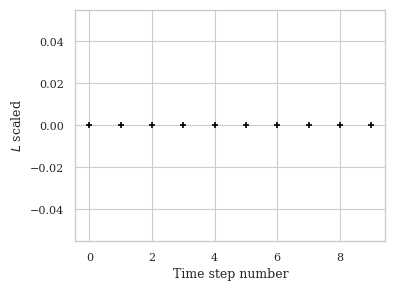

$L = L_{\mathrm{phys}}$ 0


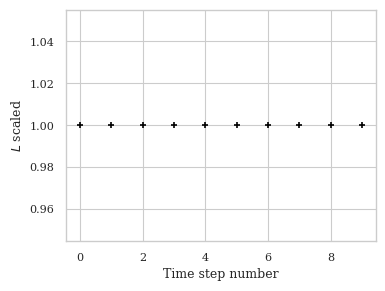

Dynamic 0


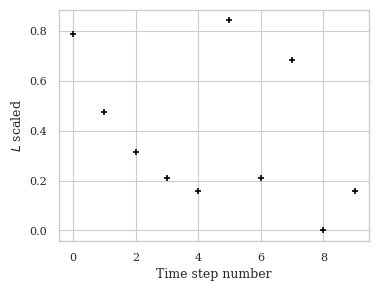

In [24]:
def make_l_factor(data: Sequence[SolverSelectionData], converged=True):
    l_factors = np.array(
        [
            x.config["gmres"]["preconditioner"]["splitting_fixed_stress"]["l_factor"]
            for x in data
        ]
    )
    if converged:
        return l_factors[make_converged_indices(data)]
    return l_factors


for name, values in data.items():
    for i, value in enumerate(values):
        print(name, i)
        plt.figure(figsize=(4, 3))
        l_factors = make_l_factor(value, converged=CONVERGED)
        plt.scatter(
            np.arange(l_factors.size), l_factors, label=name, color="black", marker="+"
        )

        plt.ylabel("$L$ scaled")
        plt.xlabel("Time step number")
        plt.show()
        if save_media_path is not None:
            plt.savefig(save_media_path / f"poro_lfactor_dt_{name}_{i}.pdf", bbox_inches="tight")

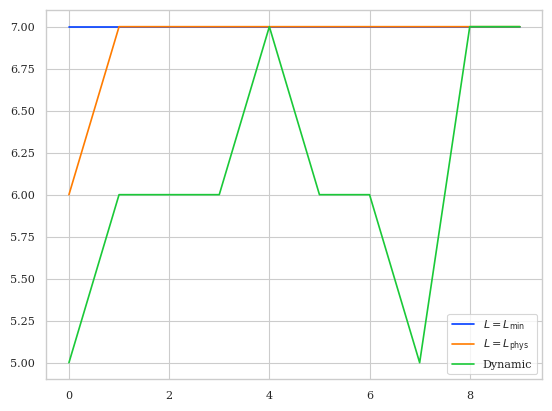

In [25]:
for name, values in data.items():
    value = values[0]
    l_factors = make_l_factor(value)
    num_iters = make_num_linear_iters(value)        
    plt.plot(num_iters, label=name)
plt.legend()

$L = L_{\mathrm{min}}$ 0


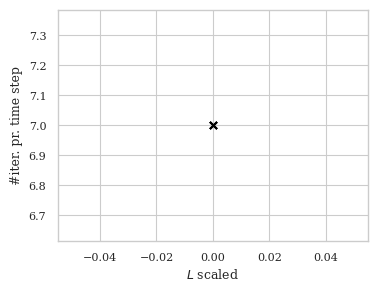

$L = L_{\mathrm{phys}}$ 0


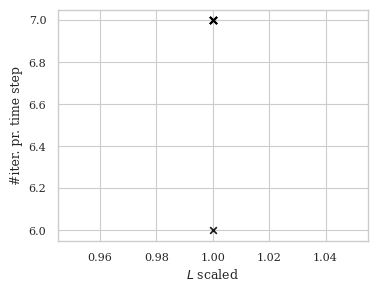

Dynamic 0


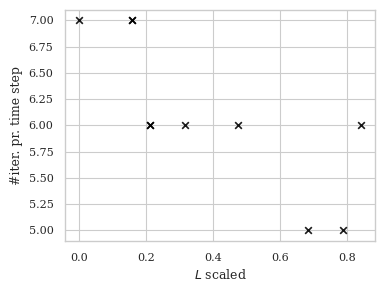

In [26]:
for name, values in data.items():
    for i, value in enumerate(values):
        print(name, i)
        plt.figure(figsize=(4, 3))
        l_factors = make_l_factor(value)
        num_iters = make_num_linear_iters(value)
        plt.scatter(l_factors, num_iters, label=name, alpha=0.9, color='black', marker='x')
        plt.ylabel('#iter. pr. time step')
        plt.xlabel('$L$ scaled')
        plt.show()
        if save_media_path is not None:
            plt.savefig(save_media_path / 'poro_iters.pdf', bbox_inches='tight')

$L = L_{\mathrm{min}}$ 4.018351078033447 0.0
$L = L_{\mathrm{phys}}$ 3.8873565196990967 0.0
Dynamic 3.7329139709472656 0.0


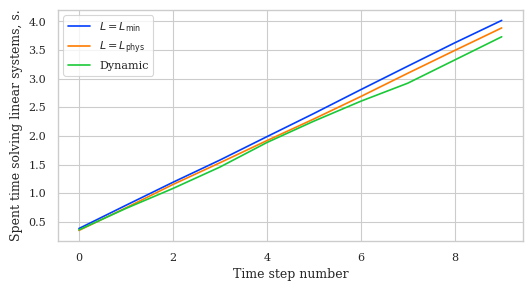

In [27]:
color_iter = -1
plt.figure(figsize=(6, 3))
for name, values in data.items():
    results = [make_solve_linear_system_time(value) for value in values]
    color_iter += 1
    make_label = True
    total = []
    for result in results:
        result = np.cumsum(result)
        total.append(result[-1])
        if make_label:
            plt.plot(result, color=f"C{color_iter}", label=name)
            make_label = False
        else:
            plt.plot(result, color=f"C{color_iter}")

    # results = np.cumsum(results, axis=1)
    # mean = np.mean(results, axis=0)
    # max = np.max(results, axis=0)
    # min = np.min(results, axis=0)
    # plt.fill_between(np.arange(mean.size), min, max, alpha=0.5)
    # plt.plot(mean, label=name)

    print(name, np.mean(total), np.max(total) - np.min(total))

plt.legend()
plt.xlabel("Time step number")
plt.ylabel("Spent time solving linear systems, s.")
if save_media_path is not None:
    plt.savefig(save_media_path / 'poro_performance.pdf', bbox_inches='tight')